In [ ]:
# Kirjastot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Lataa signaali
df = pd.read_excel("Signaali.xlsx", header=None, skiprows=1)

# Käsittele data
if df.shape[1] == 1:
    # Data muodossa: "aika,amplitudi" -> otetaan vain amplitudi
    x = df.iloc[:, 0].apply(lambda val: float(str(val).split(',')[1])).values
else:
    # Data on jo kahdessa sarakkeessa -> otetaan toinen sarake
    x = df.iloc[:, 1].values.astype(float)

N = len(x)
FS = 1000.0  # Hz
t = np.arange(N) / FS

print("=" * 60)
print("SIGNAALIN ANALYYSI")
print("=" * 60)
print(f"Tiedosto              : Signaali.xlsx")
print(f"Näytteiden lukumäärä  : {N}")
print(f"Näytteenottotaajuus   : {FS} Hz")
print(f"Signaalin kesto       : {N/FS:.3f} s")
print("=" * 60)

SIGNAALIN ANALYYSI
Tiedosto              : Signaali.xlsx
Näytteiden lukumäärä  : 7748
Näytteenottotaajuus   : 1000.0 Hz
Signaalin kesto       : 7.748 s


In [ ]:
# FFT ja tehospektri
X = np.fft.rfft(x)
f = np.fft.rfftfreq(N, d=1.0/FS)
P = np.abs(X)**2
P_db = 10 * np.log10(P + 1e-20)

# Tehokkain taajuus
idx_max = np.argmax(P)
f_max = f[idx_max]
P_max = P[idx_max]

print(f"\nTehokkain taajuus     : {f_max:.3f} Hz")
print(f"Maksimiteho           : {P_max:.3e}")
print("=" * 60)


Tehokkain taajuus     : 0.000 Hz
Maksimiteho           : 7.936e+06


✓ Tallennettu: aikasignaali.png


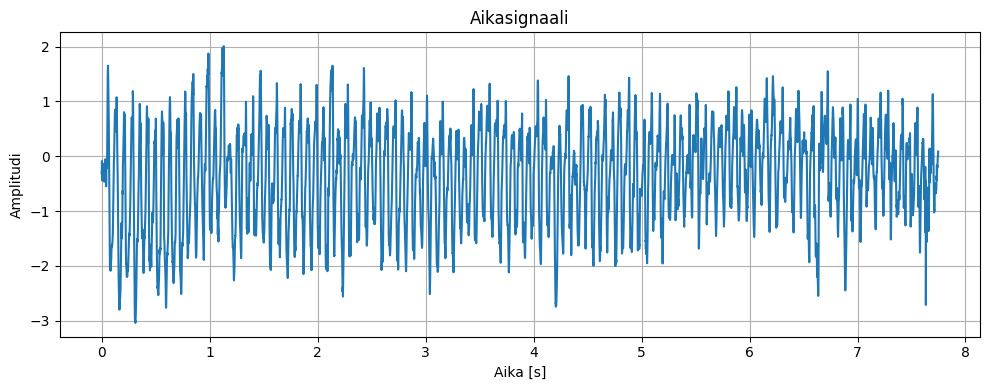

In [ ]:
# Aikasignaali
fig1, ax1 = plt.subplots(figsize=(10, 4))
ax1.plot(t, x)
ax1.set_xlabel("Aika [s]")
ax1.set_ylabel("Amplitudi")
ax1.set_title("Aikasignaali")
ax1.grid(True)
plt.tight_layout()
fig1.savefig("aikasignaali.png", dpi=300, bbox_inches='tight')
print("✓ Tallennettu: aikasignaali.png")
plt.show()

✓ Tallennettu: tehospektri.png


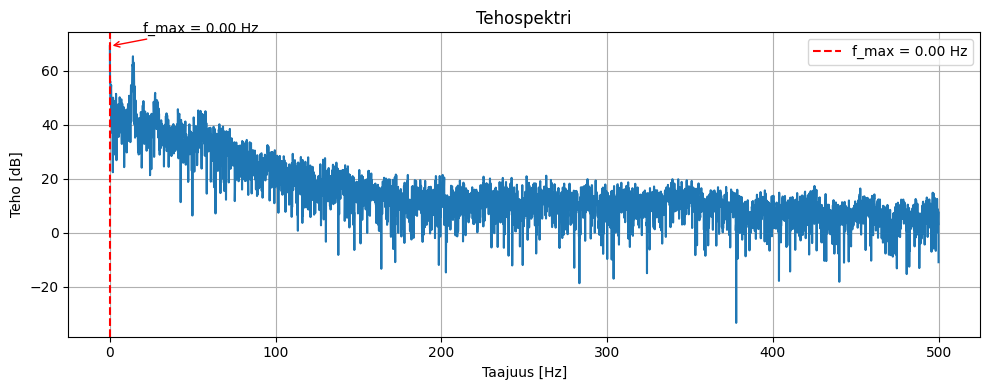


Valmis! Kuvat tallennettu.


In [ ]:
# Tehospektri
fig2, ax2 = plt.subplots(figsize=(10, 4))
ax2.plot(f, P_db)
ax2.set_xlabel("Taajuus [Hz]")
ax2.set_ylabel("Teho [dB]")
ax2.set_title("Tehospektri")
ax2.grid(True)
ax2.axvline(f_max, color='red', linestyle='--', label=f'f_max = {f_max:.2f} Hz')
ax2.annotate(f'f_max = {f_max:.2f} Hz', 
             xy=(f_max, P_db[idx_max]),
             xytext=(f_max+20, P_db[idx_max]+5),
             arrowprops=dict(arrowstyle='->', color='red'))
ax2.legend()
plt.tight_layout()
fig2.savefig("tehospektri.png", dpi=300, bbox_inches='tight')
print("✓ Tallennettu: tehospektri.png")
plt.show()

print("\nValmis! Kuvat tallennettu.")
print("=" * 60)